Columns in [NON-OCCU] DEMOGRAPHIC:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income', 'Training in Riding',
       'No. of Days in Training', 'Years of Having License',
       'Ilang oras kang bumabyahe gamit ang motorsiklo? (hours)',
       'No. of Working Hours',
       'Nagmamaneho ka rin ba ng ibang uri ng sasakyan? (Lagyan ng check lahat ng naaangkop)',
       'Traffic Violation', 'Accident in Motorcycle'],
      dtype='object')

Columns in [OCCU] DEMOGRAPHIC:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income',
       'Layunin ng Paggamit ng Motorsiklo', 'Company Affiliated',
       'Uri ng Trabaho', 'Training in Riding', 'No. of Days in Training',
       'Years of Having License', 'No. of Working Hours', 'Years as a Rider',
       'Ilang taon ka nang nagmamaneho sa kompanyang kasalukuyan mong pinagtratrabuhan?',
       'Drives other types of vehicles', 'Traffic V

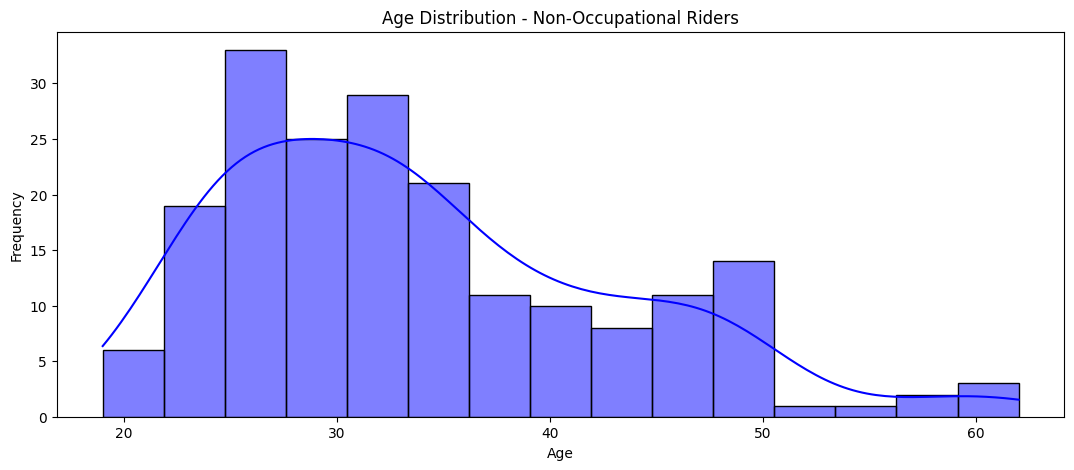

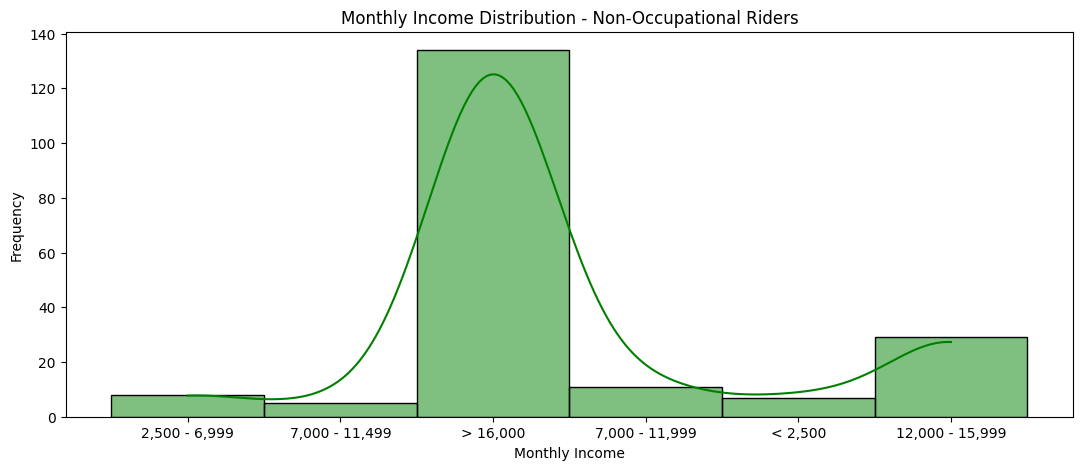

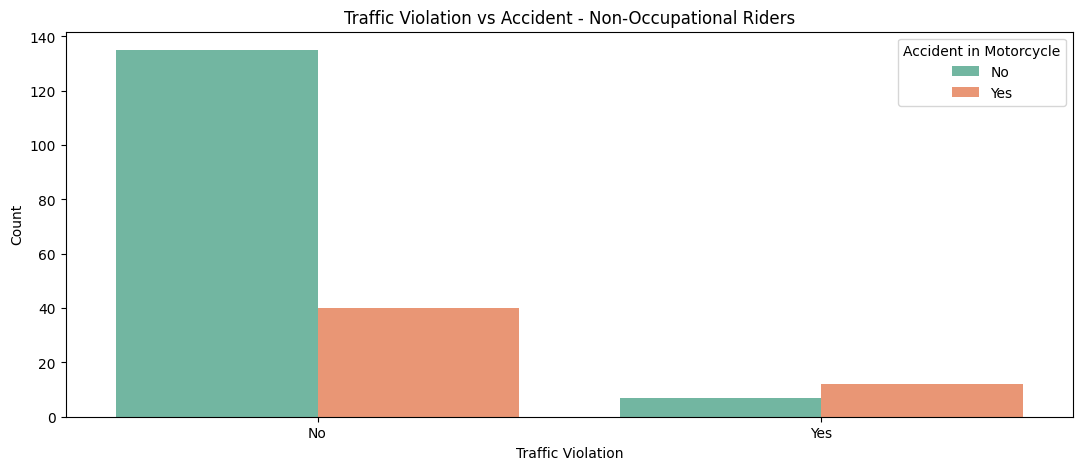


Generating visualizations for Occupational Riders...


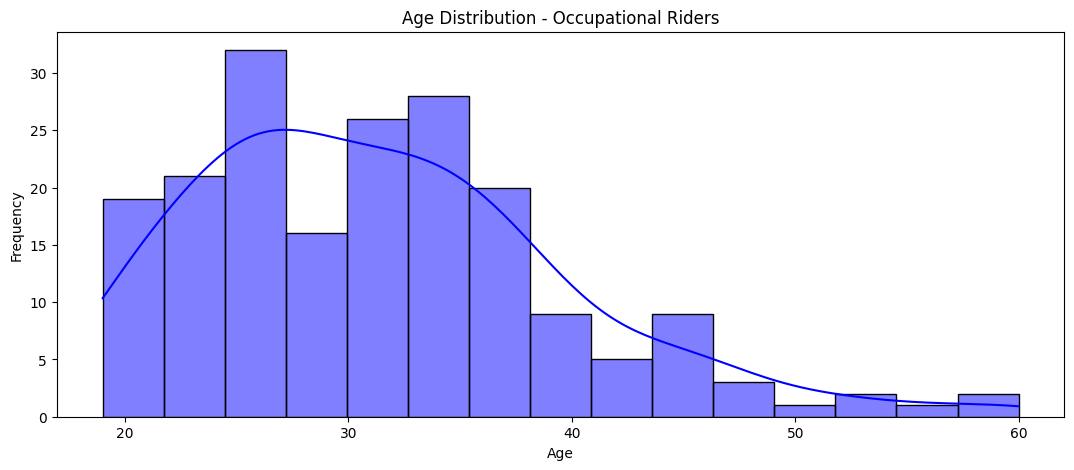

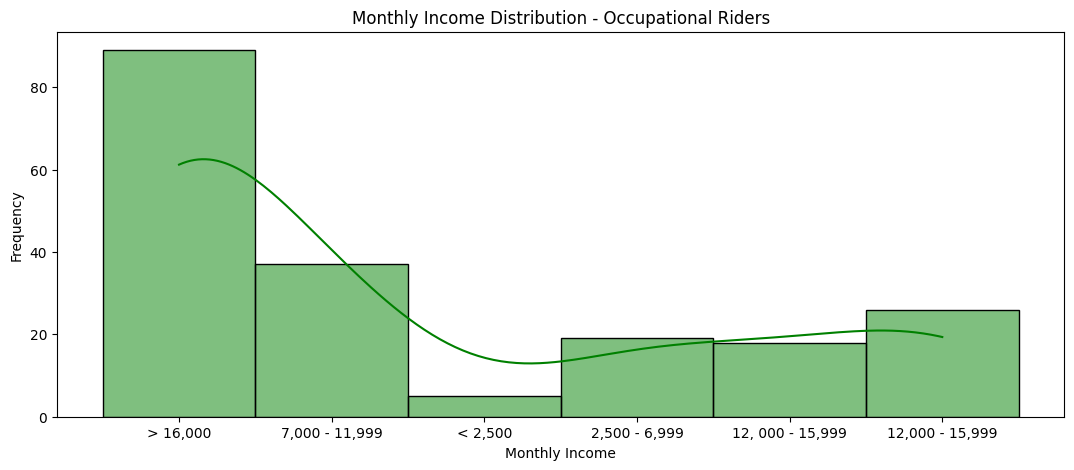

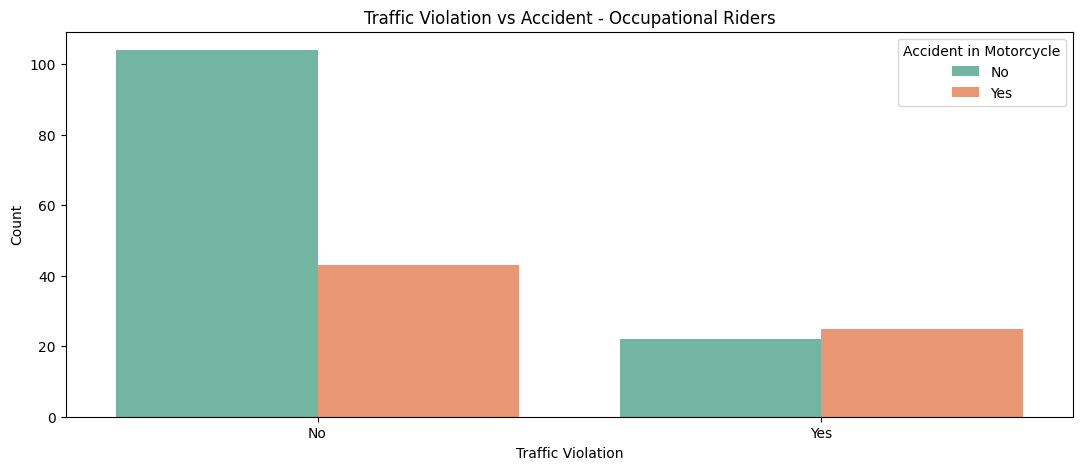


=== Correlation Matrix for Non-Occupational Riders ===
                           Age  Years of Having License
Age                      1.000                    0.623
Years of Having License  0.623                    1.000


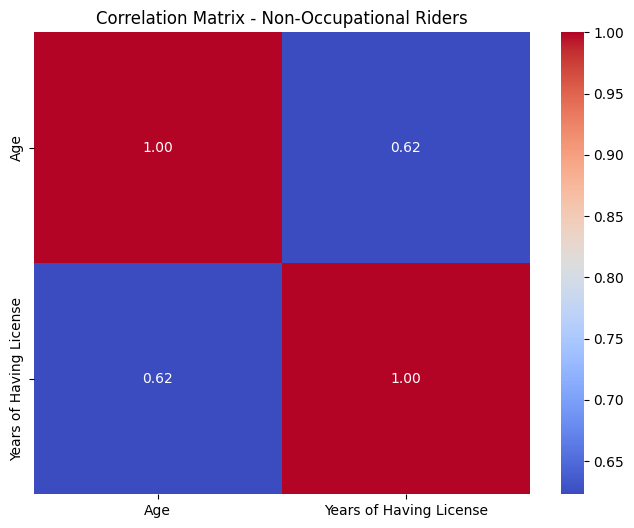


=== Correlation Matrix for Occupational Riders ===
                           Age  Years of Having License  Years as a Rider
Age                      1.000                    0.671             0.226
Years of Having License  0.671                    1.000             0.374
Years as a Rider         0.226                    0.374             1.000


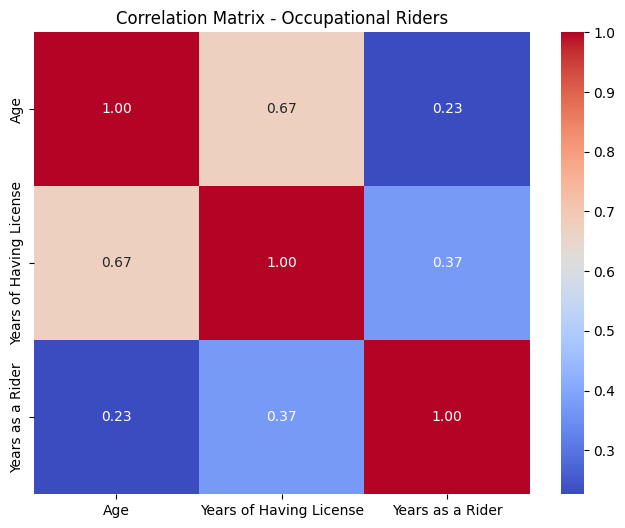

     Age                             Educational Attainment  Monthly Income  \
0     22        Senior High School Education (Grades 11-12)   2,500 - 6,999   
1     29  College/Undergraduate Education (Bachelor's De...  7,000 - 11,499   
2     41         Junior High School Education (Grades 7-10)   2,500 - 6,999   
3     32  College/Undergraduate Education (Bachelor's De...        > 16,000   
4     42  College/Undergraduate Education (Bachelor's De...        > 16,000   
..   ...                                                ...             ...   
189   35  College/Undergraduate Education (Bachelor's De...        > 16,000   
190   49  Technical-Vocational Education (TESDA Programs...        > 16,000   
191   28  College/Undergraduate Education (Bachelor's De...        > 16,000   
192   25  College/Undergraduate Education (Bachelor's De...        > 16,000   
193   47  College/Undergraduate Education (Bachelor's De...        > 16,000   

    Training in Riding  Years of Having License Tra

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Excel file ===
file_path = "file.xlsx"  # Replace with your actual path
non_occu_data = pd.read_excel(file_path, sheet_name="NON-OCCU DEMOGRAPHIC")
occu_data = pd.read_excel(file_path, sheet_name="OCCU DEMOGRAPHIC")

# === Preview column names ===
print("Columns in [NON-OCCU] DEMOGRAPHIC:")
print(non_occu_data.columns)
print("\nColumns in [OCCU] DEMOGRAPHIC:")
print(occu_data.columns)

# === Define actual column names based on Excel headers (adjust as needed after viewing) ===
non_occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Traffic Violation',
    'Accident in Motorcycle'
]

occu_features = [
    'Age',
    'Educational Attainment',
    'Monthly Income',
    'Training in Riding',
    'Years of Having License',
    'Years as a Rider',
    'Traffic Violation',
    'Accident in Motorcycle'
]

# === Select relevant columns ===
non_occu_df = non_occu_data[non_occu_features]
occu_df = occu_data[occu_features]

# === Summary statistics ===
def summarize_data(df, label):
    print(f"\n=== Summary for {label} ===")
    print(df.describe(include='all'))
    print("\n")

summarize_data(non_occu_df, "Non-Occupational Riders")
summarize_data(occu_df, "Occupational Riders")

# === Visualizations ===
def visualize_data(df, label):
    print(f"\nGenerating visualizations for {label}...")

    # Age Distribution
    plt.figure(figsize=(13, 5))
    sns.histplot(df['Age'].dropna(), kde=True, bins=15, color='blue')
    plt.title(f"Age Distribution - {label}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # Monthly Income Distribution
    plt.figure(figsize=(13, 5))
    sns.histplot(df['Monthly Income'].dropna(), kde=True, bins=15, color='green')
    plt.title(f"Monthly Income Distribution - {label}")
    plt.xlabel("Monthly Income")
    plt.ylabel("Frequency")
    plt.show()

    # Traffic Violations vs Accident
    plt.figure(figsize=(13, 5))
    sns.countplot(data=df, x='Traffic Violation', hue='Accident in Motorcycle', palette='Set2')
    plt.title(f"Traffic Violation vs Accident - {label}")
    plt.xlabel("Traffic Violation")
    plt.ylabel("Count")
    plt.legend(title="Accident in Motorcycle")
    plt.show()

visualize_data(non_occu_df, "Non-Occupational Riders")
visualize_data(occu_df, "Occupational Riders")

# === Correlation for numeric columns ===
def correlation_analysis(df, label):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_df.empty:
        corr = numeric_df.corr()

        # Print correlation matrix as text
        print(f"\n=== Correlation Matrix for {label} ===")
        print(corr.round(3))  # rounded for readability

        # Optional: save to CSV
        # corr.to_csv(f"{label}_correlation_matrix.csv")

        # Plot heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Matrix - {label}")
        plt.show()
    else:
        print(f"No numeric data to correlate for {label}")


correlation_analysis(non_occu_df, "Non-Occupational Riders")
correlation_analysis(occu_df, "Occupational Riders")
print(non_occu_df)
print(occu_df)

print("\n✅ Analysis complete. Please review the output above.")


Columns available:
Index(['Age', 'Kasarian', 'Lungsod/Rehiyon ng Paninirahan',
       'Educational Attainment', 'Monthly Income',
       'Layunin ng Paggamit ng Motorsiklo', 'Company Affiliated',
       'Uri ng Trabaho', 'Training in Riding', 'No. of Days in Training',
       'Years of Having License', 'No. of Working Hours', 'Years as a Rider',
       'Ilang taon ka nang nagmamaneho sa kompanyang kasalukuyan mong pinagtratrabuhan?',
       'Drives other types of vehicles', 'Traffic Violation',
       'Accident in Motorcycle'],
      dtype='object')

🔍 Chi-square Test: Traffic Violation vs Accident in Motorcycle
Chi2 Statistic: 7.945
Degrees of Freedom: 1
p-value: 0.0048
🔴 Significant association (p < 0.05)

🔍 Chi-square Test: Educational Attainment vs Accident in Motorcycle
Chi2 Statistic: 3.005
Degrees of Freedom: 6
p-value: 0.8083
🟢 No significant association (p >= 0.05)

🔍 Chi-square Test: Training in Riding vs Accident in Motorcycle
Chi2 Statistic: 0.103
Degrees of Freedom: 1
p-va

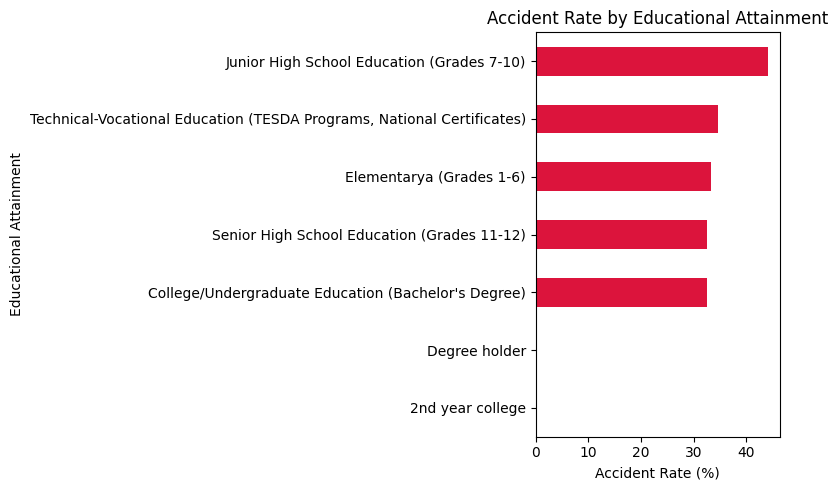


📊 Accident rate by Educational Attainment


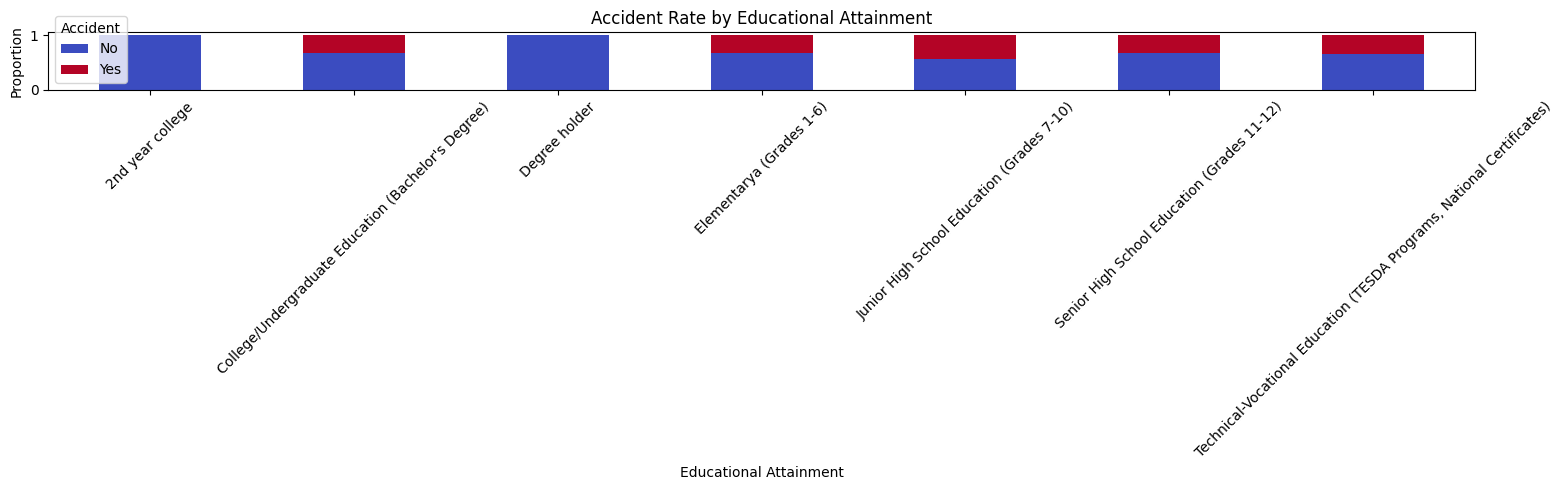


📊 Accident rate by Training in Riding


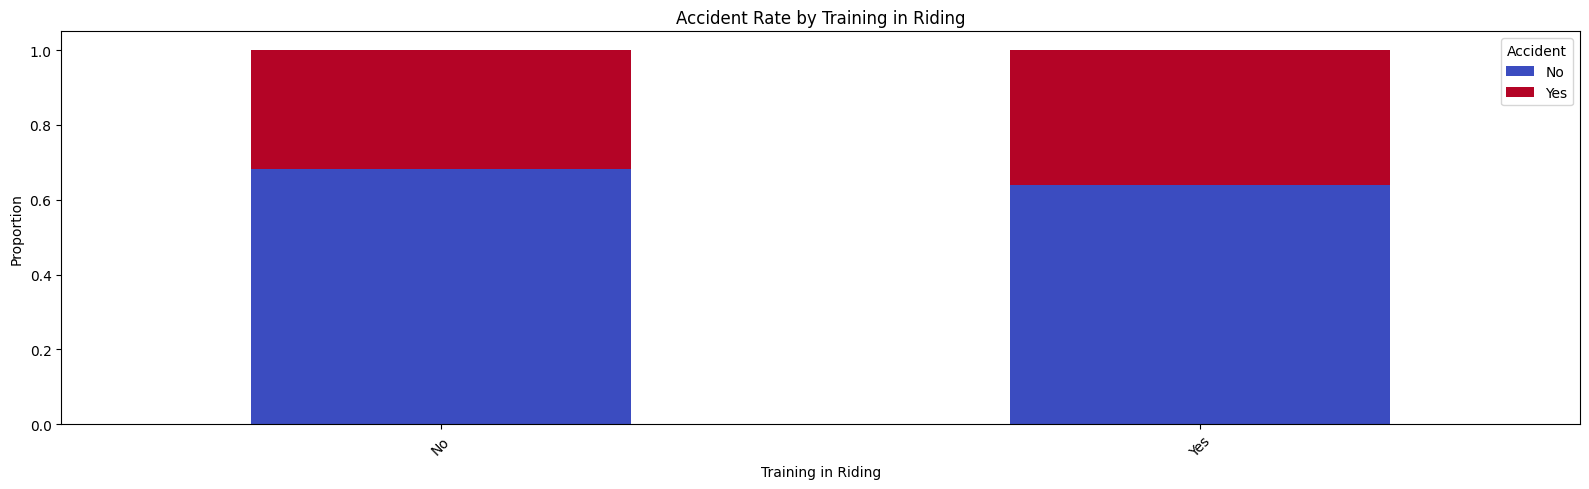


📊 Accident rate by Traffic Violation


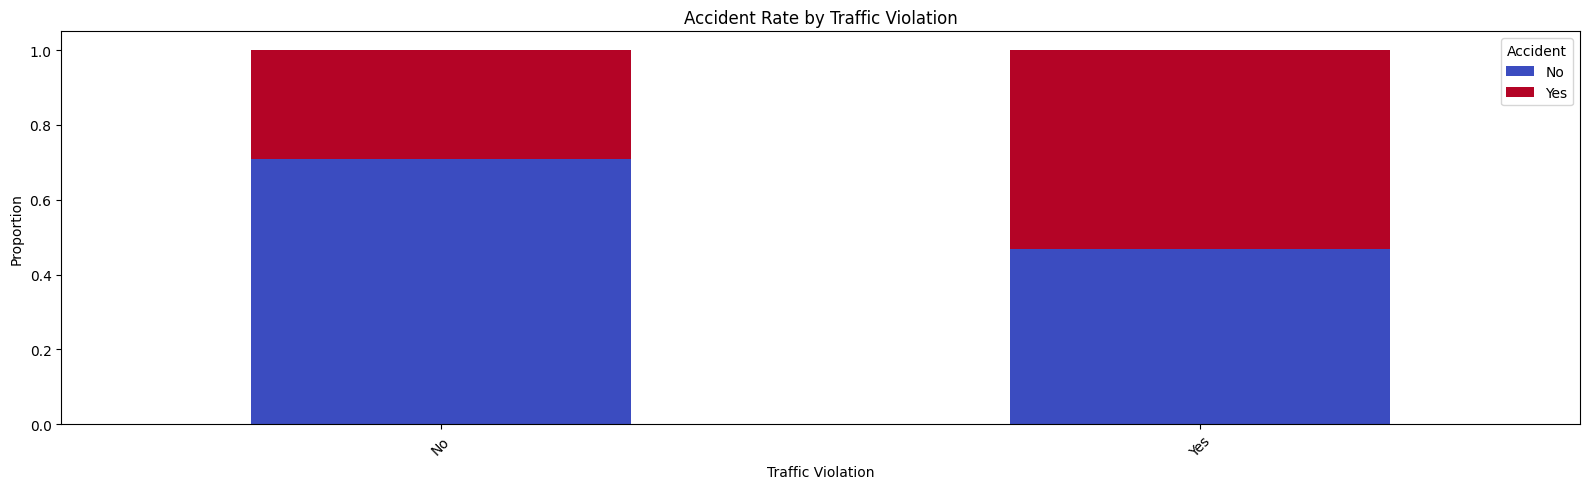

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# === Load data ===
file_path = "file.xlsx"  # Replace with your actual file path
occu_df = pd.read_excel(file_path, sheet_name="OCCU DEMOGRAPHIC")

# === Show column names for reference ===
print("Columns available:")
print(occu_df.columns)

# === Chi-square Test Function ===
def chi_square_test(df, var1, var2):
    print(f"\n🔍 Chi-square Test: {var1} vs {var2}")
    table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(table)
    print("Chi2 Statistic:", round(chi2, 3))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 4))
    if p < 0.05:
        print("🔴 Significant association (p < 0.05)")
    else:
        print("🟢 No significant association (p >= 0.05)")

# Run Chi-square Tests
chi_square_test(occu_df, 'Traffic Violation', 'Accident in Motorcycle')
chi_square_test(occu_df, 'Educational Attainment', 'Accident in Motorcycle')
chi_square_test(occu_df, 'Training in Riding', 'Accident in Motorcycle')

def show_accident_rate_by_education(df):
    print("\n📊 Accident Rate by Educational Attainment:\n")
    rate_data = df[['Educational Attainment', 'Accident in Motorcycle']].dropna()

    # Create frequency table
    summary = (
        rate_data.groupby('Educational Attainment')['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Convert column names to string to avoid AttributeError
    summary.columns = summary.columns.astype(str)

    # Try to identify the 'Accident' column (could be 'Yes', '1', 'True', etc.)
    accident_col = [col for col in summary.columns if col.lower() in ['yes', '1', 'true'] or 'accident' in col.lower()]
    if accident_col:
        summary['Accident Rate (%)'] = summary[accident_col[0]] * 100
    else:
        print("⚠️ Could not detect accident column. Please check the column values manually.")
        print("Columns found:", summary.columns)
        return

    summary['Total Riders'] = rate_data['Educational Attainment'].value_counts()
    print(summary[['Accident Rate (%)', 'Total Riders']].sort_values('Accident Rate (%)', ascending=False))


# Call function
show_accident_rate_by_education(occu_df)

def plot_accident_rate_by_education(df):
    data = df[['Educational Attainment', 'Accident in Motorcycle']].dropna()
    rate_df = (
        data.groupby('Educational Attainment')['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    # Ensure columns are strings
    rate_df.columns = rate_df.columns.astype(str)

    # Detect accident column name
    accident_col = [col for col in rate_df.columns if col.lower() in ['yes', '1', 'true'] or 'accident' in col.lower()]
    if accident_col:
        rate_df['Accident Rate (%)'] = rate_df[accident_col[0]] * 100
    else:
        print("⚠️ Accident column not found for plotting.")
        print("Columns available:", rate_df.columns)
        return

    # Plot
    rate_df['Accident Rate (%)'].sort_values(ascending=True).plot(
        kind='barh', color='crimson', figsize=(8, 5)
    )
    plt.title("Accident Rate by Educational Attainment")
    plt.xlabel("Accident Rate (%)")
    plt.tight_layout()
    plt.show()
show_accident_rate_by_education(occu_df)
plot_accident_rate_by_education(occu_df)


# === Bar Plot: Accident Rate by Group ===
def plot_accident_rate_by_group(df, group_col):
    print(f"\n📊 Accident rate by {group_col}")
    plot_data = df[[group_col, 'Accident in Motorcycle']].dropna()
    summary = (
        plot_data.groupby(group_col)['Accident in Motorcycle']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )
    summary.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(16, 5))
    plt.title(f"Accident Rate by {group_col}")
    plt.ylabel("Proportion")
    plt.xlabel(group_col)
    plt.xticks(rotation=45)
    plt.legend(title="Accident")
    plt.tight_layout()
    plt.show()

# Run Bar Plots
plot_accident_rate_by_group(occu_df, 'Educational Attainment')
plot_accident_rate_by_group(occu_df, 'Training in Riding')
plot_accident_rate_by_group(occu_df, 'Traffic Violation')
